In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json
import csv

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)
print(api_key)

99f62900074692d8654988582765b53b


In [2]:
 # List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = list(zip(lats, lngs))

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

637

In [3]:
print('Beginning Data Retrieval')   
print('-----------------------------')
weather_results = []

for i in range (0, 10):
    lat_long = lat_lngs[i]
    lat = lat_long[0]
    long = lat_long[1]
    city = cities[i]

    print(f'Processing Record {i} | {city}')
    # Prevent rate limiting & locked account
    time.sleep(1.1)
    
    # Calling weather API for current weather data
    weather_response = requests.get(f"http://api.openweathermap.org/data/2.5/weather?units=imperial&lat={lat}&lon={long}&APPID={api_key}")
    if weather_response.status_code == 200:
        json = weather_response.json()
        temp_max = json['main']['temp_max']
        humidity = json['main']['humidity']
        wind_speed = json['wind']['speed']
        cloudiness = json['clouds']['all']
        latitude = json['coord']['lat']
        longitude = json['coord']['lon']
        country = json['sys'].get('country', 'N/A')
        dt = json['dt']
        weather_results.append({ 'city': city, 'cloudiness': cloudiness, 'country': country, 'date': dt, 'humidity': humidity, 'lat': latitude, 'lng': longitude, 'max_temp': temp_max, 'max_speed': wind_speed})
    
    else:
        print("City not found. Skipping ...")
        
print('-----------------------------')
print('Data Retrieval Complete')     
print('-----------------------------')


Beginning Data Retrieval
-----------------------------
Processing Record 0 | ushuaia
Processing Record 1 | sakakah
Processing Record 2 | creel
Processing Record 3 | grindavik
Processing Record 4 | mokhsogollokh
Processing Record 5 | hirara
Processing Record 6 | atar
Processing Record 7 | dali
Processing Record 8 | bethel
Processing Record 9 | punta arenas
-----------------------------
Data Retrieval Complete
-----------------------------


In [4]:

# Open the file using "write" mode. Specify the variable to hold the contents
with open(output_data_file, 'w', newline='') as csvfile:

    # Initialize csv.writer
    csvwriter = csv.writer(csvfile, delimiter=',')

    # Write the first row (column headers)
    csvwriter.writerow(['City', 'Cloudiness', 'Country', 'Date', 'Humidity', 'Lat', 'Lng', 'Max Temp', 'Wind Speed'])

    # Write the second row
    for weather_dictionary in weather_results:
        csvwriter.writerow([weather_dictionary['city'], weather_dictionary['cloudiness'], weather_dictionary['country'], weather_dictionary['date'], weather_dictionary['humidity'], weather_dictionary['lat'], weather_dictionary['lng'], weather_dictionary['max_temp'], weather_dictionary['max_speed']])

In [5]:
#Create Dataframe  
weather_df = pd.DataFrame(weather_results)
weather_df.head()

,city,cloudiness,country,date,humidity,lat,lng,max_speed,max_temp
0,ushuaia,100,N/A,1570500245,97,-80.98,-64.70,8.68,-15.10
1,sakakah,0,SA,1570500246,47,30.63,41.74,4.70,75.20
2,creel,27,MX,1570500247,88,27.18,-106.99,5.01,56.89
3,grindavik,100,IS,1570500249,93,63.07,-22.27,21.56,48.08
4,mokhsogollokh,100,RU,1570500250,92,62.54,128.34,7.58,31.15


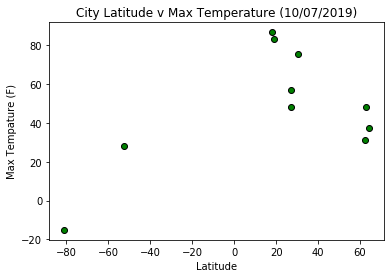

In [6]:
lat_tempature = weather_df.copy()[['lat', 'max_temp']]

# Tell matplotlib to create a scatter plot based upon the above data
plt.scatter(lat_tempature['lat'],lat_tempature['max_temp'], marker="o", facecolors="green", edgecolors="black")

# Create a title, x label, and y label for our chart
plt.title("City Latitude v Max Temperature (10/07/2019)")
plt.xlabel("Latitude")
plt.ylabel("Max Tempature (F)")

 # Save an image of the chart and print to screen
plt.savefig("../WeatherPy/City-Latitude-vs-Max-Tempature.png")
plt.show()